![imagem](https://ecoms1-nyc3.nyc3.cdn.digitaloceanspaces.com/2686/@v3/1622666121077-banner-ifood.jpg)

# Análise dados de logística iFood
Esta análise se propõe a estudar uma porção de dados relacionados à logística da empresa **iFood**.

Existem algumas questões a serem resolvidas, que são:

- De acordo com os dados recebidos, você diria que houve algum evento especial ou situação anormal durante o período? Por quê?

- Observando os dados como cliente, você diria que prefere fazer pedidos em qual dia da semana e em qual restaurante? Por quê?

- Analisando os dados, como você identificaria que um restaurante pode estar tendo problemas na sua operação de delivery?

- Se você fosse dono(a) de um restaurante, o que você sugeriria para o iFood melhorar a operação logística tendo em vista os dados fornecidos? Por quê?

Vamos buscar responder a essas perguntas, uma de cada vez.



In [1]:
#Vamos fazer a devida importação das bibliotecas necessárias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
df = pd.read_csv('IfoodCase.csv')
df

,numero_pedido,modelo_entrega,tipo_entrega,hora_data_pedido,tempo_real_ate_restaurante_seg,tempo_estimado_ate_restaurante_seg,tempo_real_ate_coleta_seg,tempo_entrega_real_seg,tempo_entrega_estimado_seg,id_rota,...,tipo_loja,id_loja,flag_atraso_pedido,atraso_pedido_seg,flag_atraso_entregador,atraso_entregador_seg,flag_atraso_restaurante,atraso_restaurante_seg,distancia_restaurante_cliente_km,distancia_ate_restaurante_km
0,1720226675,OWN_DELIVERY,ORDINARY,2020-04-06T00:00:24.465Z,367,1020,896,1198,2400,141589002,...,RESTAURANT,313041,False,0,False,0,False,0,3.07,2.57
1,1720227497,OWN_DELIVERY,ORDINARY,2020-04-06T00:01:47.796Z,909,1380,1284,2105,2340,141589279,...,RESTAURANT,568040,False,0,False,0,False,0,1.45,3.31
2,1720227574,OWN_DELIVERY,ORDINARY,2020-04-06T00:01:57.596Z,791,900,1303,1513,1920,141589455,...,RESTAURANT,265301,False,0,False,0,True,403,1.33,1.88
3,1720227586,OWN_DELIVERY,ORDINARY,2020-04-06T00:01:58.303Z,818,600,1126,1426,1440,141590121,...,RESTAURANT,555191,False,0,True,218,True,526,1.76,0.39
4,1720228970,OWN_DELIVERY,ORDINARY,2020-04-06T00:03:59.301Z,205,900,1048,1419,2280,141589357,...,RESTAURANT,265301,False,0,False,0,True,148,3.99,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153599,1740328646,OWN_DELIVERY,ORDINARY,2020-04-12T23:58:55.444Z,2225,960,2466,3418,2220,145403140,...,RESTAURANT,265301,True,1198,True,1265,False,0,10.35,11.46
153600,1740329218,OWN_DELIVERY,ORDINARY,2020-04-12T23:59:32.506Z,1349,600,1388,1967,1500,145401895,...,RESTAURANT,194040,True,467,True,749,False,0,7.14,11.72
153601,1740329288,OWN_DELIVERY,ORDINARY,2020-04-12T23:59:38.923Z,215,600,488,1264,1980,145401352,...,RESTAURANT,194040,False,0,False,0,False,0,8.83,1.13
153602,1740329354,ON_DEMAND,ORDINARY,2020-04-12T23:59:43.647Z,1481,0,1701,2833,7200,145402958,...,RESTAURANT,248362,False,0,True,1481,False,0,11.48,5.26


## Sobre os dados:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153604 entries, 0 to 153603
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   numero_pedido                       153604 non-null  int64  
 1   modelo_entrega                      153604 non-null  object 
 2   tipo_entrega                        153604 non-null  object 
 3   hora_data_pedido                    153604 non-null  object 
 4   tempo_real_ate_restaurante_seg      153604 non-null  int64  
 5   tempo_estimado_ate_restaurante_seg  153604 non-null  int64  
 6   tempo_real_ate_coleta_seg           153604 non-null  int64  
 7   tempo_entrega_real_seg              153604 non-null  int64  
 8   tempo_entrega_estimado_seg          153604 non-null  int64  
 9   id_rota                             153604 non-null  int64  
 10  tipo_rota                           153604 non-null  object 
 11  modal                     

In [4]:
df.isnull().sum()

numero_pedido                         0
modelo_entrega                        0
tipo_entrega                          0
hora_data_pedido                      0
tempo_real_ate_restaurante_seg        0
tempo_estimado_ate_restaurante_seg    0
tempo_real_ate_coleta_seg             0
tempo_entrega_real_seg                0
tempo_entrega_estimado_seg            0
id_rota                               0
tipo_rota                             0
modal                                 0
tipo_loja                             0
id_loja                               0
flag_atraso_pedido                    0
atraso_pedido_seg                     0
flag_atraso_entregador                0
atraso_entregador_seg                 0
flag_atraso_restaurante               0
atraso_restaurante_seg                0
distancia_restaurante_cliente_km      0
distancia_ate_restaurante_km          0
dtype: int64

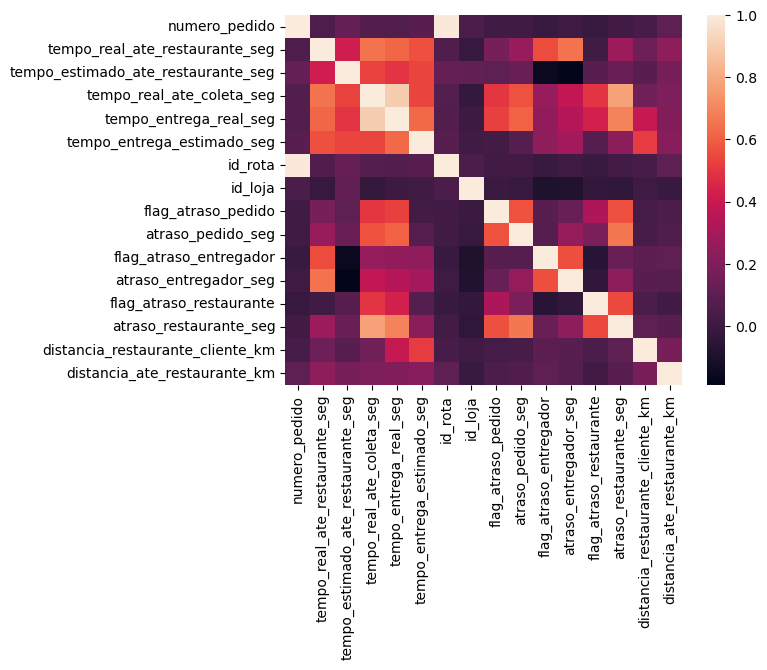

In [5]:
sns.heatmap(df.corr(), annot = False, cbar = True)
plt.show()

Há uma série de correlações interessantes que serão analisadas posteriormente.

Sem valores nulos, podemos avançar. Vamos fazer uma separação da coluna 'hora_data_pedido' em outras colunas com maior granularidade.

## 1) - De acordo com os dados recebidos, você diria que houve algum evento especial ou situação anormal durante o período? Por quê?
Analisando as figuras 1, 2 e 3, podemos perceber que há um acréscimo considerável dos pedidos no dia de sábado com uma baixa taxa de atrasos nas entregas. Segunda-feira é o dia com o menor número total de pedidos e sexta-feira o dia em que há a maior taxa de atrasos.

In [6]:
df['hora_data_pedido'] = pd.to_datetime(df['hora_data_pedido'])
df['Data'] = df['hora_data_pedido'].dt.date
df['Hora'] = df['hora_data_pedido'].dt.hour
df['Minuto'] = df['hora_data_pedido'].dt.minute

In [7]:
col = df.groupby(['Hora', 'Data'])['numero_pedido'].count().unstack(1).columns
col = pd.to_datetime(col).to_frame()['Data'].dt.day_name().to_frame()
col.rename(columns = {'Data':'Dia da semana'})
#Essa etapa nos ajuda a caracterizar os dias do dataset por seus relativos dias da semana.

,Dia da semana
Data,
2020-04-06,Monday
2020-04-07,Tuesday
2020-04-08,Wednesday
2020-04-09,Thursday
2020-04-10,Friday
2020-04-11,Saturday
2020-04-12,Sunday


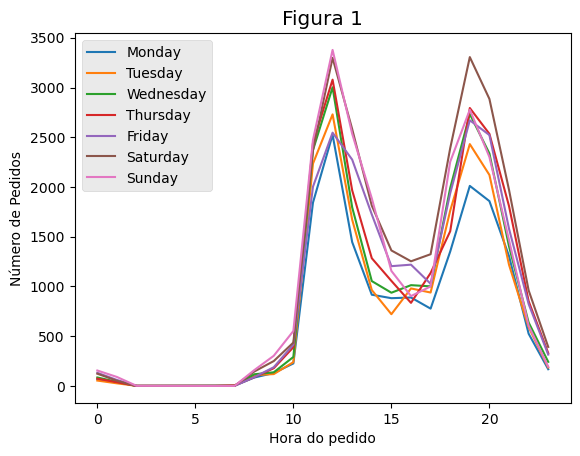

In [8]:
df.groupby(['Hora', 'Data'])['numero_pedido'].count().unstack(1).fillna(0).plot()
plt.style.use('ggplot')
plt.xlabel('Hora do pedido', color = 'black')
plt.ylabel('Número de Pedidos', color = 'black')
plt.title('Figura 1')
plt.legend(col['Data'])
plt.show()

In [9]:
df1 = df.groupby('Data')['flag_atraso_pedido'].value_counts().to_frame()
df1 = df1.unstack(1).droplevel(0, axis = 1)
df1 = df1.rename(columns = {False:'Não atrasou', True:'Atrasou'})
df1.columns.name = ''

In [10]:
df1['Proporção'] = df1['Atrasou'] / df1['Não atrasou']
df1 = df1.reset_index()

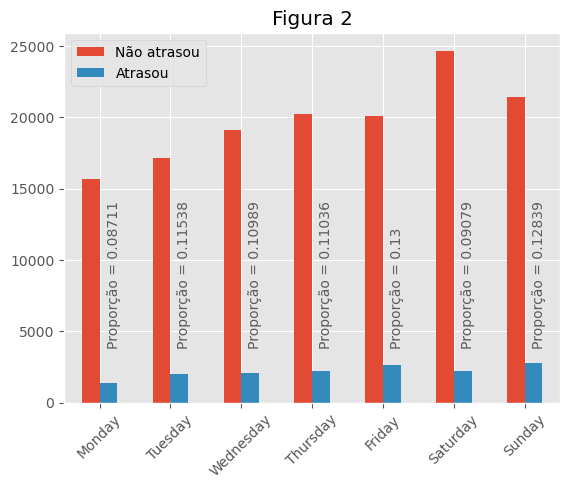

In [11]:
df1.drop('Proporção', axis = 1).plot(kind = 'bar')
for i in range(len(df1)):
    plt.text(df1.index[i]+0.1, 4000, 'Proporção = ' + str(round(df1["Proporção"][i],5)), rotation = 90, alpha = 0.6)
plt.xticks(list(range(7)), col['Data'], rotation = 45)
plt.title('Figura 2')
plt.show()

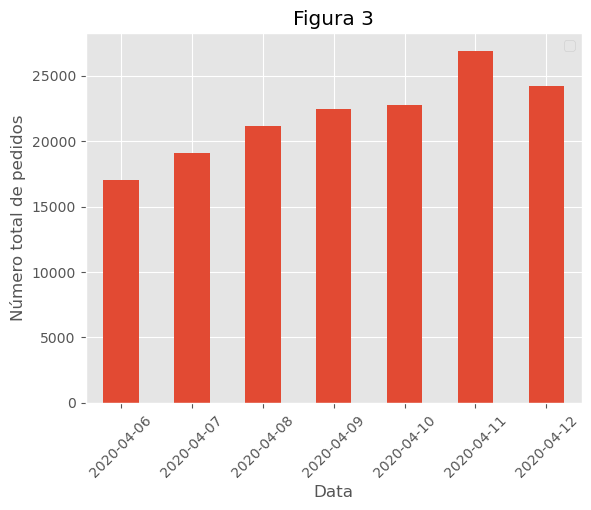

In [12]:
df.groupby('Data')['numero_pedido'].count().to_frame().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.ylabel('Número total de pedidos')
plt.title('Figura 3')
plt.legend('')
plt.show()

## 2) - Observando os dados como cliente, você diria que prefere fazer pedidos em qual dia da semana e em qual restaurante? Por quê?

Essa questão não foi muito bem formulada, pois devemos considerar que existe um conjunto de bons restaurantes para fazer pedidos. Vamos considerar os restaurantes que não apresentam atrasos em cada dia, o que irá gerar uma lista de restaurantes.

In [13]:
df2 = df[['Data', 'id_loja', 'flag_atraso_restaurante']]

In [14]:
df2 = df2[df2['flag_atraso_restaurante']==True]
df2 = df2.groupby(['Data', 'id_loja'])['flag_atraso_restaurante'].count().to_frame()


In [15]:
df2 = df2.unstack(0).fillna(0).droplevel(0, axis = 1)

In [16]:
df2 = df2.reset_index()
df2.columns.name = ''
df2.columns = df2.columns.astype(str)

In [17]:
df2.columns

Index(['id_loja', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12'],
      dtype='object', name='')

In [18]:
id1 = []
data1 = []
na1 = []
for i in df2.columns:
    if i != 'id_loja':
        ai = df2[df2[i] == df2[i].max()][['id_loja', i]]
        ai = ai.melt(id_vars = 'id_loja', var_name='Data', value_name = 'Número de atrasos')
        id1.append(dict(ai)['id_loja'])
        data1.append(dict(ai)['Data'])
        na1.append(dict(ai)['Número de atrasos'])

In [19]:
id1 = pd.DataFrame(id1).reset_index(drop=True).rename(columns = {0:'id_loja'})
data1 = pd.DataFrame(data1).reset_index(drop=True).rename(columns = {0:'Data'})
na1 = pd.DataFrame(na1).reset_index(drop=True).rename(columns = {0:'Número de atrasos'})

In [20]:
tbatraso = id1.merge(data1, left_index = True, right_index =True).merge(na1.astype(int), left_index = True, right_index =True)
tbatraso

,id_loja,Data,Número de atrasos
0,248145,2020-04-06,75
1,1019459,2020-04-07,105
2,561160,2020-04-08,145
3,301717,2020-04-09,119
4,171081,2020-04-10,205
5,1019471,2020-04-11,122
6,171081,2020-04-12,150


## Observando a tabela acima, podemos ver os restaurantes com o maior número de atrasos em cada dia.

Este porém foi o jeito mais trabalhoso de fazer essa pesquisa, a pesquisa para restaurantes com os menores números de atrasos, porém de uma forma mais simples.

In [21]:
df3 = df[['Data', 'id_loja', 'flag_atraso_restaurante']]
df3 = df3.groupby(['Data', 'id_loja'])['flag_atraso_restaurante'].value_counts().to_frame().unstack(2)
df3 = df3.fillna(0).droplevel(0, axis = 1)

In [22]:
df3.columns.name = None

In [23]:
df3 = df3[df3[False]==df3[False].min()][False].to_frame()

In [24]:
df3 = df3.drop(columns = False)


In [25]:
df3

Empty DataFrame
Columns: []
Index: [(2020-04-06, 20196), (2020-04-06, 26711), (2020-04-06, 27281), (2020-04-06, 54945), (2020-04-06, 56908), (2020-04-06, 66604), (2020-04-06, 67823), (2020-04-06, 135828), (2020-04-06, 137199), (2020-04-06, 140881), (2020-04-06, 141284), (2020-04-06, 143507), (2020-04-06, 165060), (2020-04-06, 175740), (2020-04-06, 177284), (2020-04-06, 183276), (2020-04-06, 185268), (2020-04-06, 188807), (2020-04-06, 195247), (2020-04-06, 196402), (2020-04-06, 203031), (2020-04-06, 219786), (2020-04-06, 219833), (2020-04-06, 225108), (2020-04-06, 234775), (2020-04-06, 235621), (2020-04-06, 236629), (2020-04-06, 236798), (2020-04-06, 241055), (2020-04-06, 243818), (2020-04-06, 245556), (2020-04-06, 252175), (2020-04-06, 267260), (2020-04-06, 267746), (2020-04-06, 270376), (2020-04-06, 278140), (2020-04-06, 278857), (2020-04-06, 278962), (2020-04-06, 281562), (2020-04-06, 289173), (2020-04-06, 289787), (2020-04-06, 289820), (2020-04-06, 291972), (2020-04-06, 296186), (2020-04-06, 297512), (2020-04-06, 299745), (2020-04-06, 301909), (2020-04-06, 308880), (2020-04-06, 309740), (2020-04-06, 311820), (2020-04-06, 313422), (2020-04-06, 314655), (2020-04-06, 315173), (2020-04-06, 315705), (2020-04-06, 316130), (2020-04-06, 317725), (2020-04-06, 320323), (2020-04-06, 322910), (2020-04-06, 323397), (2020-04-06, 323489), (2020-04-06, 323609), (2020-04-06, 324765), (2020-04-06, 325287), (2020-04-06, 327385), (2020-04-06, 336343), (2020-04-06, 336930), (2020-04-06, 512303), (2020-04-06, 513054), (2020-04-06, 513379), (2020-04-06, 515712), (2020-04-06, 519061), (2020-04-06, 522999), (2020-04-06, 530463), (2020-04-06, 533464), (2020-04-06, 534363), (2020-04-06, 536067), (2020-04-06, 536598), (2020-04-06, 537186), (2020-04-06, 541567), (2020-04-06, 541646), (2020-04-06, 543111), (2020-04-06, 546021), (2020-04-06, 547708), (2020-04-06, 549025), (2020-04-06, 551856), (2020-04-06, 552347), (2020-04-06, 552944), (2020-04-06, 553166), (2020-04-06, 554700), (2020-04-06, 561572), (2020-04-06, 564776), (2020-04-06, 567939), (2020-04-06, 567949), (2020-04-06, 568031), (2020-04-06, 568894), (2020-04-06, 570305), (2020-04-06, 571424), (2020-04-06, 572737), (2020-04-06, 573071), (2020-04-06, 576062), ...]

[1184 rows x 0 columns]

## Acima temos a lista com os id's das lojas que não atrasaram em nenhum pedido, agrupadas pela data.

Podemos fazer uma série de análises com essa lista, porém, vamos avançar nas questões.

## 3) - Analisando os dados, como você identificaria que um restaurante pode estar tendo problemas na sua operação de delivery?
### Observando a tabela 'tbatraso' vemos os id das lojas que tiveram o maior número de atrasos em cada dia da semana:

In [26]:
tbatraso

,id_loja,Data,Número de atrasos
0,248145,2020-04-06,75
1,1019459,2020-04-07,105
2,561160,2020-04-08,145
3,301717,2020-04-09,119
4,171081,2020-04-10,205
5,1019471,2020-04-11,122
6,171081,2020-04-12,150


### Essa é a análise com maior granularidade possível, pois estamos pegando apenas uma loja em cada dia, porém, podemos perceber que o estabelecimento de id = '171081' foi o com maior número de atrasos em dois dias da semana. Considerando a grande quantidade de estabelecimentos registrados, essa é uma estatística preocupante!

## 4) - Se você fosse dono(a) de um restaurante, o que você sugeriria para o iFood melhorar a operação logística tendo em vista os dados fornecidos? Por quê?

### Essa questão é mais complicada, por isso merece uma maior atenção em nossa análise;
## Vamos analisar novamente a figura 1, dessa vez com uma formatação um pouco diferente:



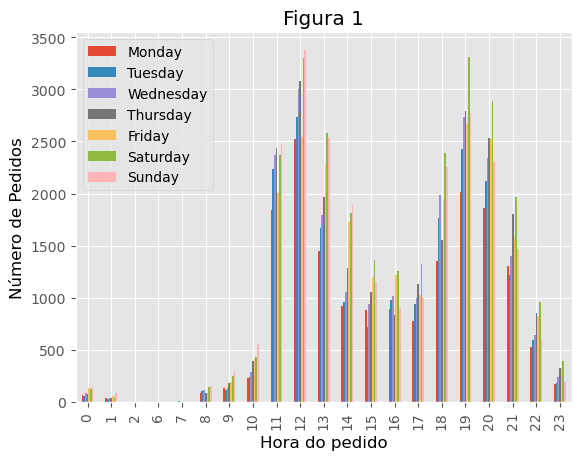

In [31]:
df.groupby(['Hora', 'Data'])['numero_pedido'].count().unstack(1).fillna(0).plot(kind = 'bar')
plt.style.use('ggplot')
plt.xlabel('Hora do pedido', color = 'black')
plt.ylabel('Número de Pedidos', color = 'black')
plt.title('Figura 1')
plt.legend(col['Data'])
plt.show()

### Podemos perceber que os horários de pico ocorrem em torno de 12 e 19 horas, o que seria o horário do almoço e do jantar. Contudo, segunda-feira é o dia em que o número de pedidos nos horários de pico é o menor.

### Minha sugestão seria algo do tipo: Vamos potencializar as vendas nas segundas-feiras!

### Que tal aumentar o número de cupom nas segundas, ao troco de reduzir, nos finais de semana?

### A ideia é simples, nos finais de semana as pessoas irão fazer seus pedidos por razões diferentes dos pedidos nas segundas. Minha opinião é de que nos finais de semana as pessoas estão com seus namorados(as), com a família, filhos, etc. e preferem fazer os pedidos a fim de passar mais tempo com seus amigos e família. Vamos então potencializar as compras nas segundas!

In [38]:
df.distancia_restaurante_cliente_km.mean()

4.513023944688931

In [39]:
df.distancia_restaurante_cliente_km.std()

3.2839528113023855

In [45]:
df.groupby('flag_atraso_entregador')['distancia_restaurante_cliente_km'].mean().to_frame()

,distancia_restaurante_cliente_km
flag_atraso_entregador,
False,4.409927
True,5.444428


### Além do que já foi apresentado, olhando a tabela acima podemos ver que em média, restaurantes com maior distância à residência do cliente apresentam maior número de atrasos na entrega. A minha sugestão é incentivar os clientes a comprarem em estabelecimentos mais próximos de suas residências. Essa é uma estratégia interessante e de fácil implementação.

# Por enquanto é isso :)
## **Cheers**